##**Notebook PC#08**
## Simple Recurrent Neural Network, Linear Predictor, MLP and LSTM for multi-step time series prediction.<BR>

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Taylon Luan Congio Martins RA: 177379<br>
**Aluno(a):** Tiago C A Amorim RA: 100675

In [26]:
# Loading all the relevant libraries
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

## **A base [unemployment rate] foi baixada no [link](https://fred.stlouisfed.org/series/UNRATE).**

In [27]:
# Structuring the dataset from a single time series, scaling and spliting into training / testing
def get_train_test(dataset, split_percent, time_steps, horizon):
    df = read_csv(dataset, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    # There is a kind of data leakage in the next command
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    df = DataFrame()
    for i in range(0,time_steps):
      df['t-' + str(time_steps-i-1)] = [data[j] for j in range(i, (len(data)-horizon-time_steps+i+1))]
    for i in range(1,horizon+1):
      df['t+' + str(i)] = [data[j] for j in range(time_steps+i-1, (len(data)-horizon+i))]
    print(df)
    df1 = df.copy()
    for i in range(1,horizon+1):
      df1 = df1.drop(['t+' + str(i)], axis = 1)
    dataX = np.array(df1) #separacao de dados de time_steps
    df2 = df['t+1']
    for i in range(2,horizon+1):
      df2 = pd.concat([df2, df['t+' + str(i)]], axis=1)
    datay = np.array(df2) #separacao de dados de horizon
    # Point for splitting data into train and test
    split = int(n*split_percent)
    X = dataX[range(split),:]
    y = datay[range(split)]
    Xt = dataX[split:,:]
    yt = datay[split:]
    return X, y, Xt, yt

time_steps = 11
horizon = 3
# Here you will decide which dataset to consider.
# X, y, Xt, yt = get_train_test('unemployment_rate.csv', 0.8, time_steps, horizon)
X, y, Xt, yt = get_train_test('monthly_sunspot.csv', 0.8, time_steps, horizon)

          t-10       t-9       t-8       t-7       t-6       t-5       t-4  \
0     0.228526  0.246651  0.275808  0.219464  0.334909  0.328999  0.373522   
1     0.246651  0.275808  0.219464  0.334909  0.328999  0.373522  0.261229   
2     0.275808  0.219464  0.334909  0.328999  0.373522  0.261229  0.299054   
3     0.219464  0.334909  0.328999  0.373522  0.261229  0.299054  0.297478   
4     0.334909  0.328999  0.373522  0.261229  0.299054  0.297478  0.624901   
...        ...       ...       ...       ...       ...       ...       ...   
2802  0.418046  0.423956  0.468085  0.373128  0.386525  0.500394  0.332151   
2803  0.423956  0.468085  0.373128  0.386525  0.500394  0.332151  0.200946   
2804  0.468085  0.373128  0.386525  0.500394  0.332151  0.200946  0.262017   
2805  0.373128  0.386525  0.500394  0.332151  0.200946  0.262017  0.317967   
2806  0.386525  0.500394  0.332151  0.200946  0.262017  0.317967  0.390859   

           t-3       t-2       t-1       t-0       t+1       t+

In [28]:
print(X.shape)
print(y.shape)

(2256, 11)
(2256, 3)


## **Implementing the simple recurrent neural network**

In [29]:
# Execute this cell or the cell associated with one of the other predictors. They are mutually exclusive.
def create_RNN(hidden_units, dense_units, input_shape, activation):
        model = Sequential()
        model.add(SimpleRNN(hidden_units, activation=activation[0], input_shape=input_shape))
        model.add(Dense(units=dense_units, activation=activation[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

def RNN_predictor (X, y, time_steps):
    model = create_RNN(hidden_units=30, dense_units=horizon, input_shape=(time_steps,1), activation=['tanh', 'tanh'])
    train_predict = model.fit(X, y, epochs=20, batch_size=1, verbose=2)
    return model

RNN_model = RNN_predictor(X, y, time_steps)

Epoch 1/20
2256/2256 - 11s - loss: 0.0065 - 11s/epoch - 5ms/step
Epoch 2/20
2256/2256 - 6s - loss: 0.0048 - 6s/epoch - 3ms/step
Epoch 3/20
2256/2256 - 8s - loss: 0.0047 - 8s/epoch - 4ms/step
Epoch 4/20
2256/2256 - 7s - loss: 0.0047 - 7s/epoch - 3ms/step
Epoch 5/20
2256/2256 - 10s - loss: 0.0047 - 10s/epoch - 4ms/step
Epoch 6/20
2256/2256 - 8s - loss: 0.0046 - 8s/epoch - 3ms/step
Epoch 7/20
2256/2256 - 6s - loss: 0.0046 - 6s/epoch - 3ms/step
Epoch 8/20
2256/2256 - 7s - loss: 0.0046 - 7s/epoch - 3ms/step
Epoch 9/20
2256/2256 - 6s - loss: 0.0046 - 6s/epoch - 3ms/step
Epoch 10/20
2256/2256 - 7s - loss: 0.0046 - 7s/epoch - 3ms/step
Epoch 11/20
2256/2256 - 6s - loss: 0.0045 - 6s/epoch - 3ms/step
Epoch 12/20
2256/2256 - 9s - loss: 0.0046 - 9s/epoch - 4ms/step
Epoch 13/20
2256/2256 - 6s - loss: 0.0045 - 6s/epoch - 3ms/step
Epoch 14/20
2256/2256 - 7s - loss: 0.0045 - 7s/epoch - 3ms/step
Epoch 15/20
2256/2256 - 6s - loss: 0.0046 - 6s/epoch - 3ms/step
Epoch 16/20
2256/2256 - 8s - loss: 0.0046 - 8

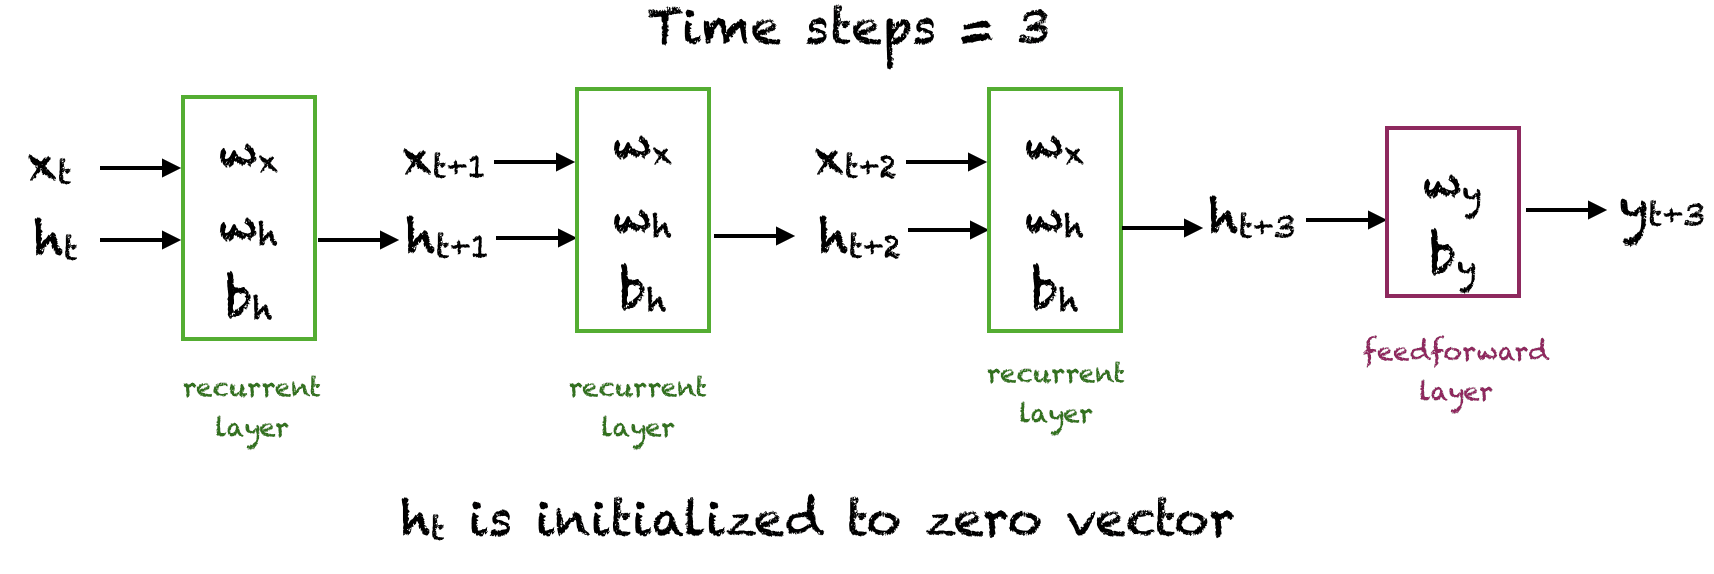

In [30]:
# [Do not run this cell] or [Upload the PNG file and then run].
# Configuration of the simple RNN
from IPython.display import Image
Image("RNN_info_flow.png", width = 600, height = 300)

In [31]:
wx = RNN_model.get_weights()[0]
wh = RNN_model.get_weights()[1]
bh = RNN_model.get_weights()[2]
wy = RNN_model.get_weights()[3]
by = RNN_model.get_weights()[4]
print(wx.shape)
print(wh.shape)
print(bh.shape)
print(wy.shape)
print(by.shape)

(1, 30)
(30, 30)
(30,)
(30, 3)
(3,)


## **Implementing a linear predictor**

In [32]:
# Execute this cell or the cell associated with one of the other predictors. They are mutually exclusive.
def linear_predictor(X,y):
    model = LinearRegression()
    train_predict = model.fit(X, y)
    print(model.coef_)
    print(model.intercept_)

    return model

linear_model = linear_predictor(X,y)

[[-0.03231146 -0.03466097  0.07275847  0.00478093 -0.01082086  0.0669384
   0.04085789  0.08718769  0.07405268  0.13080613  0.5568415 ]
 [-0.08074499 -0.01733866  0.01364125  0.08068237  0.00291312  0.03024416
   0.09379476  0.09038365  0.12686113  0.15160784  0.43763587]
 [-0.10533409 -0.04564735  0.02615331  0.02253815  0.08277366  0.03709105
   0.05409302  0.13282879  0.12137729  0.19044921  0.3907065 ]]
[0.00763167 0.01236634 0.01638974]


## **Implementing the multilayer perceptron neural network (MLP)**

In [33]:
# Execute this cell or the cell associated with one of the other predictors. They are mutually exclusive.
def MLP_predictor():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80, activation=tf.nn.tanh),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(horizon, activation='linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error')
  train_predict = model.fit(X, y, epochs=100)
  model.summary()

  return model

MLP_model = MLP_predictor()

Epoch 1/100
71/71 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 11/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 12/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 13/100
71/71 [=================

## **Implementing the long short-term memory network (LSTM)**

In [34]:
def LSTM_predictor(X, y, time_steps):
    X1 = X.reshape(X.shape[0],time_steps,1)
    model=Sequential()
    model.add(LSTM(25,input_shape=(time_steps,1)))
    model.add(Dense(horizon,activation='linear'))
    model.compile(loss='mean_squared_error',optimizer='adam')

    train_predict = model.fit(X1,y,epochs=200,verbose=2)

    return model

LSTM_model = LSTM_predictor(X, y, time_steps)
print(LSTM_model.summary())

Epoch 1/200
71/71 - 4s - loss: 0.0122 - 4s/epoch - 52ms/step
Epoch 2/200
71/71 - 1s - loss: 0.0055 - 542ms/epoch - 8ms/step
Epoch 3/200
71/71 - 0s - loss: 0.0053 - 480ms/epoch - 7ms/step
Epoch 4/200
71/71 - 0s - loss: 0.0051 - 383ms/epoch - 5ms/step
Epoch 5/200
71/71 - 0s - loss: 0.0049 - 420ms/epoch - 6ms/step
Epoch 6/200
71/71 - 0s - loss: 0.0048 - 405ms/epoch - 6ms/step
Epoch 7/200
71/71 - 0s - loss: 0.0047 - 399ms/epoch - 6ms/step
Epoch 8/200
71/71 - 0s - loss: 0.0047 - 412ms/epoch - 6ms/step
Epoch 9/200
71/71 - 0s - loss: 0.0046 - 486ms/epoch - 7ms/step
Epoch 10/200
71/71 - 0s - loss: 0.0046 - 483ms/epoch - 7ms/step
Epoch 11/200
71/71 - 0s - loss: 0.0046 - 414ms/epoch - 6ms/step
Epoch 12/200
71/71 - 0s - loss: 0.0046 - 400ms/epoch - 6ms/step
Epoch 13/200
71/71 - 0s - loss: 0.0045 - 422ms/epoch - 6ms/step
Epoch 14/200
71/71 - 0s - loss: 0.0045 - 379ms/epoch - 5ms/step
Epoch 15/200
71/71 - 0s - loss: 0.0045 - 408ms/epoch - 6ms/step
Epoch 16/200
71/71 - 0s - loss: 0.0045 - 380ms/epoc

In [35]:
def print_error(trainY, testY, train_predict, test_predict,i):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('t+%d RMSE train: %.3f RMSE' % (i+1, train_rmse))
    print('t+%d RMSE test: %.3f RMSE' % (i+1, test_rmse))
    return [train_rmse, test_rmse]


def RMSE(train_predict, test_predict):
  rmse = []
  for i in range(horizon):
    if(horizon == 1):
      y1_pred = train_predict
      y1_pred_t = test_predict
      y1 = y
      y1_t = yt
    elif(horizon > 1):
      y1_pred = train_predict[:,i]
      y1_pred_t = test_predict[:,i]
      y1 = y[:,i]
      y1_t = yt[:,i]

    erro = print_error(y1, y1_t, y1_pred, y1_pred_t,i)
    rmse.append(erro)

  # Create a DataFrame from the rmse values for each horizon
  df = pd.DataFrame(rmse)
  df.columns = ['train', 'test']
  return df


In [36]:
# Plot the predictions together with the actual values
def plot_result(trainY, testY, train_predict, test_predict,i):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 6), dpi=300)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Time steps')
    plt.ylabel('Actual and Predicted Values')
    plt.title('t+%d Predition (The Red Line Separates The Training And Test Examples)' % (i+1))
    plt.grid(True)

def plot_predict(train_predict, test_predict, y, yt):
  for i in range(horizon):
    if(horizon == 1):
      y1_pred = train_predict
      y1_pred_t = test_predict
      y1 = y
      y1_t = yt
    elif(horizon > 1):
      y1_pred = train_predict[:,i]
      y1_pred_t = test_predict[:,i]
      y1 = y[:,i]
      y1_t = yt[:,i]
    plot_result(y1, y1_t, y1_pred, y1_pred_t,i)


In [37]:
print ('***** RNN MODEL *****')
train_predict = RNN_model.predict(X)
test_predict = RNN_model.predict(Xt)
df1 = RMSE(train_predict, test_predict)
plot_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [38]:
print ('***** LINEAR MODEL *****')
train_predict = linear_model.predict(X)
test_predict = linear_model.predict(Xt)
df2 = RMSE(train_predict, test_predict)
plot_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [39]:
print ('***** MLP MODEL *****')
train_predict = MLP_model.predict(X)
test_predict = MLP_model.predict(Xt)
df3 = RMSE(train_predict, test_predict)
plot_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [40]:
print ('***** LSTM MODEL *****')
train_predict = LSTM_model.predict(X)
test_predict = LSTM_model.predict(Xt)
df4 = RMSE(train_predict, test_predict)
plot_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
# Plot the prediction error
def plot_result2(trainY, testY, train_predict, test_predict,i):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 6), dpi=300)
    plt.plot(range(rows), actual - predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.xlabel('Time steps')
    plt.ylabel('Actual minus Predicted Values')
    plt.title('t+%d Predition Error (The Red Line Separates The Training And Test Examples)' % (i+1))
    plt.ylim(-0.5, +1.0) # Please, set the interval appropriately, considering all the graphs.
    plt.grid(True)

def plot_error_predict(train_predict, test_predict, y, yt):
    for i in range(horizon):
      if(horizon == 1):
        y1_pred = train_predict
        y1_pred_t = test_predict
        y1 = y
        y1_t = yt
      elif(horizon > 1):
        y1_pred = train_predict[:,i]
        y1_pred_t = test_predict[:,i]
        y1 = y[:,i]
        y1_t = yt[:,i]
      plot_result2(y1, y1_t, y1_pred, y1_pred_t,i)

In [42]:
print ('***** RNN MODEL *****')
train_predict = RNN_model.predict(X)
test_predict = RNN_model.predict(Xt)
plot_error_predict(train_predict, test_predict, y, yt)


Output hidden; open in https://colab.research.google.com to view.

In [43]:
print ('***** LINEAR MODEL *****')
train_predict = linear_model.predict(X)
test_predict = linear_model.predict(Xt)
plot_error_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [44]:
print ('***** MLP MODEL *****')
train_predict = MLP_model.predict(X)
test_predict = MLP_model.predict(Xt)
plot_error_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

In [45]:
print ('***** LSTM MODEL *****')
train_predict = LSTM_model.predict(X)
test_predict = LSTM_model.predict(Xt)
plot_error_predict(train_predict, test_predict, y, yt)

Output hidden; open in https://colab.research.google.com to view.

## **Exhibit a dataframe with the final results for each predictor**

In [46]:
DF_results = pd.concat([df1, df2, df3, df4], axis=1, keys=['RNN', 'LINEAR', 'MLP', 'LSTM'])
DF_results.index = ['t+1', 't+2', 't+3']
DF_results

RNN              LINEAR                 MLP                LSTM  \
        train      test     train      test     train      test     train   
t+1  0.058662  0.081405  0.058257  0.073480  0.058971  0.073808  0.058341   
t+2  0.067110  0.095589  0.066630  0.087041  0.066815  0.087245  0.065288   
t+3  0.071986  0.096882  0.071136  0.093434  0.071302  0.093825  0.069183   

               
         test  
t+1  0.081194  
t+2  0.094619  
t+3  0.097029

In [47]:
DF_results.mean()

RNN     train    0.065919
        test     0.091292
LINEAR  train    0.065341
        test     0.084652
MLP     train    0.065696
        test     0.084959
LSTM    train    0.064271
        test     0.090947
dtype: float64

## **Use the SimpleRNN model to make a search for the best [time_steps].**

In [48]:
time_steps = [1, 2, 7, 11, 50]
horizon = 3
DF1 = pd.DataFrame()

for timesteps in time_steps:
    X, y, Xt, yt = get_train_test('monthly_sunspot.csv', 0.8, timesteps, horizon)
    RNN_model = RNN_predictor(X, y, timesteps)
    train_predict = RNN_model.predict(X)
    test_predict = RNN_model.predict(Xt)
    rmse  = RMSE(train_predict, test_predict)
    rmse.columns = pd.MultiIndex.from_product([[timesteps], rmse.columns])
    DF1 = pd.concat([DF1, rmse], axis=1)

           t-0       t+1       t+2       t+3
0     0.228526  0.246651  0.275808  0.219464
1     0.246651  0.275808  0.219464  0.334909
2     0.275808  0.219464  0.334909  0.328999
3     0.219464  0.334909  0.328999  0.373522
4     0.334909  0.328999  0.373522  0.261229
...        ...       ...       ...       ...
2812  0.390859  0.358944  0.323877  0.282900
2813  0.358944  0.323877  0.282900  0.198188
2814  0.323877  0.282900  0.198188  0.219858
2815  0.282900  0.198188  0.219858  0.131206
2816  0.198188  0.219858  0.131206  0.131600

[2817 rows x 4 columns]
Epoch 1/20
2256/2256 - 5s - loss: 0.0059 - 5s/epoch - 2ms/step
Epoch 2/20
2256/2256 - 4s - loss: 0.0053 - 4s/epoch - 2ms/step
Epoch 3/20
2256/2256 - 5s - loss: 0.0052 - 5s/epoch - 2ms/step
Epoch 4/20
2256/2256 - 4s - loss: 0.0052 - 4s/epoch - 2ms/step
Epoch 5/20
2256/2256 - 4s - loss: 0.0052 - 4s/epoch - 2ms/step
Epoch 6/20
2256/2256 - 4s - loss: 0.0052 - 4s/epoch - 2ms/step
Epoch 7/20
2256/2256 - 5s - loss: 0.0053 - 5s/epoch - 2ms

In [49]:
DF1.index = ['t+1', 't+2', 't+3']
DF1

1                   2                   7                   11  \
        train      test     train      test     train      test     train   
t+1  0.064150  0.080630  0.061050  0.078810  0.059708  0.077314  0.058889   
t+2  0.072283  0.097161  0.069198  0.092796  0.068839  0.089582  0.067223   
t+3  0.077462  0.101741  0.073677  0.099639  0.073256  0.096183  0.071413   

                     50            
         test     train      test  
t+1  0.082158  0.057654  0.077233  
t+2  0.097483  0.064194  0.087211  
t+3  0.098081  0.068279  0.091360

## **Use the LSTM model to make a search for the best [time_steps].**

In [50]:
time_steps = [1, 2, 7, 11, 50]
horizon = 3
DF2 = pd.DataFrame()

for timesteps in time_steps:
    X, y, Xt, yt = get_train_test('monthly_sunspot.csv', 0.8, timesteps, horizon)
    LSTM_model = LSTM_predictor(X, y, timesteps)
    train_predict = LSTM_model.predict(X)
    test_predict = LSTM_model.predict(Xt)
    rmse  = RMSE(train_predict, test_predict)
    rmse.columns = pd.MultiIndex.from_product([[timesteps], rmse.columns])
    DF2 = pd.concat([DF2, rmse], axis=1)

           t-0       t+1       t+2       t+3
0     0.228526  0.246651  0.275808  0.219464
1     0.246651  0.275808  0.219464  0.334909
2     0.275808  0.219464  0.334909  0.328999
3     0.219464  0.334909  0.328999  0.373522
4     0.334909  0.328999  0.373522  0.261229
...        ...       ...       ...       ...
2812  0.390859  0.358944  0.323877  0.282900
2813  0.358944  0.323877  0.282900  0.198188
2814  0.323877  0.282900  0.198188  0.219858
2815  0.282900  0.198188  0.219858  0.131206
2816  0.198188  0.219858  0.131206  0.131600

[2817 rows x 4 columns]
Epoch 1/200
71/71 - 2s - loss: 0.0332 - 2s/epoch - 34ms/step
Epoch 2/200
71/71 - 0s - loss: 0.0161 - 166ms/epoch - 2ms/step
Epoch 3/200
71/71 - 0s - loss: 0.0125 - 218ms/epoch - 3ms/step
Epoch 4/200
71/71 - 0s - loss: 0.0091 - 209ms/epoch - 3ms/step
Epoch 5/200
71/71 - 0s - loss: 0.0066 - 243ms/epoch - 3ms/step
Epoch 6/200
71/71 - 0s - loss: 0.0055 - 230ms/epoch - 3ms/step
Epoch 7/200
71/71 - 0s - loss: 0.0053 - 213ms/epoch - 3ms/s

In [51]:
DF2.index = ['t+1', 't+2', 't+3']
DF2

1                   2                   7                   11  \
        train      test     train      test     train      test     train   
t+1  0.062604  0.081947  0.060327  0.078576  0.058654  0.074448  0.057729   
t+2  0.072129  0.100309  0.069198  0.093635  0.067020  0.088910  0.065415   
t+3  0.076941  0.107233  0.073683  0.101240  0.071810  0.096470  0.069397   

                     50            
         test     train      test  
t+1  0.074152  0.054570  0.073974  
t+2  0.088725  0.058947  0.088661  
t+3  0.093728  0.060754  0.097603

(a)	Explique o papel dos parâmetros de projeto [time_steps] e [horizon].

**Resposta:**<BR>

(b)	Qual a diferença no uso do parâmetro [time_steps] no caso dos preditores não-recorrentes e no caso do bloco LSTM?

**Resposta:**<BR>

(c)	Qual modelo de predição levou a um melhor desempenho junto aos dados de teste em cada caso?

**Resposta:**<BR>

(d)	Ao se variar o [horizon], apresente uma hipótese para a perda de desempenho conforme [horizon] cresce de 1 até 3, comportamento produzido por todos os modelos de predição, nos dois casos de estudo.

**Resposta:**<BR>

(e)	Ao se variar o [time_steps] especificamente para os modelos SimpleRNN e LSTM, procure explicar o comportamento observado em cada caso de estudo.

**Resposta:**<BR>